## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 4
Due 11/4/2024 by 5p

### Problem 1
Write a function ```greaterThan(A, lower_lim)``` that takes as an argument a numpy array A and a number lower_lim and returns an array with every entry less than or equal to lower_lim replaced by zero. That is to say, only the numbers strictly greater than lower_lim remain, the rest are 0.


In [4]:
import numpy as np

def greaterThan(A, lower_lim):
    # Create a copy of the array to avoid modifying the original
    result = np.copy(A)
    # Replace values less than or equal to lower_lim with 0
    result[result <= lower_lim] = 0
    return result
    
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

You passed all the tests!


### Problem 2
Write a function ```subtractMean(A)``` that takes as an input the numpy array and returns the array with the mean of all the values subtracted from every element.

In [5]:
def subtractMean(A):
    # Calculate the mean of all elements in the array
    mean_value = np.mean(A)
    # Subtract the mean from each element in the array
    return A - mean_value

If the tests below aren't passing, check the values of A, B, and C. These should be the same as in the test for Problem 1. If the values in these arrays have changed, why might that be?

In [6]:
assert np.isclose(subtractMean(A), np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])).all()
assert np.isclose(subtractMean(B), np.array([[-1.5,  0.5],[ 1.5, -2.5],[-0.5,  2.5]])).all()
assert np.isclose(subtractMean(C), np.array([[ 1.1,  0. , -0.1],[-0.2,  0.1, -1.1],[ 3.2, -1. , -2. ]])).all()

print("You passed all the tests!")


You passed all the tests!


### Problem 3

Write a function ```arrayEdges``` that takes as an input an array and returns a 1-D array of all the elements on the edges of the array starting at the upper left corner and working around clockwise. Do not repeat that first element. If the original array is not 2-D, print('Error') and return -1.

*Hint*: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners), and make an array of zeros the size of the perimeter. Then fill that array.

*Hint 2*: The length of the shape of a 2-D array is 2.

*Hint 3*: ```dA = A.dtype``` is the data type of A. ```np.zeros().astype(dA)``` creates an array of that type (if A has strings, this will make an array of '0').

In [7]:

def arrayEdges(A):
    # Check if the array is 2-D
    if len(A.shape) != 2:
        print('Error')
        return -1
    
    # Get dimensions
    height, width = A.shape
    
    # Determine the data type of A and initialize a 1D array for edges
    dA = A.dtype
    perimeter_size = 2 * height + 2 * width - 4  # Calculate perimeter length without double-counting corners
    edges = np.zeros(perimeter_size, dtype=dA)
    
    # Fill edges array clockwise
    index = 0
    # Top row (left to right)
    for j in range(width):
        edges[index] = A[0, j]
        index += 1
    # Right column (top to bottom)
    for i in range(1, height):
        edges[index] = A[i, width - 1]
        index += 1
    # Bottom row (right to left)
    for j in range(width - 2, -1, -1):
        edges[index] = A[height - 1, j]
        index += 1
    # Left column (bottom to top)
    for i in range(height - 2, 0, -1):
        edges[index] = A[i, 0]
        index += 1
    
    return edges

In [9]:
'''Test your code'''

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])

assert np.array(arrayEdges(X) == np.array([1, 2, 3, 6, 9, 8, 7, 4])).all()
assert np.array(arrayEdges(Y) == np.array(['you', 'got', 'this', 'problem', 'correct', '!'])).all()
assert arrayEdges(Z) == -1

print("You passed all the tests! (disregard that it says Error above...it's supposed to do that)")


Error
You passed all the tests! (disregard that it says Error above...it's supposed to do that)


## Palmer's Penguins

Below I've imported the Palmer's Penguins dataset, courtesy of Alison Horst's github. Fill in the blanks in Problem 4. You should add code cells below to write code to find the answers.

In [11]:
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
pp_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Problem 4

 1. How many penguins were recorded? 

  - 

 2. In terms of body mass, how big were the smallest and biggest penguins measured?

  - 
  - 

 3. What species of penguins were recorded and how many of each?

 - 
 - 
 -

In [13]:
num_penguins = pp_df.shape[0]
print(f"Number of penguins recorded: {num_penguins}")


min_mass = pp_df['body_mass_g'].min()
max_mass = pp_df['body_mass_g'].max()
print(f"Smallest body mass: {min_mass} g")
print(f"Largest body mass: {max_mass} g")




species_counts = pp_df['species'].value_counts()
print("Species counts:")
print(species_counts)



def get_species_counts(df):
    return df['species'].value_counts()




Number of penguins recorded: 344
Smallest body mass: 2700.0 g
Largest body mass: 6300.0 g
Species counts:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


### Problem 5

Plot a histogram of the body masses of penguins grouped by species. Make sure to include a title, axis labels, and a legend.

Matplotlib is building the font cache; this may take a moment.


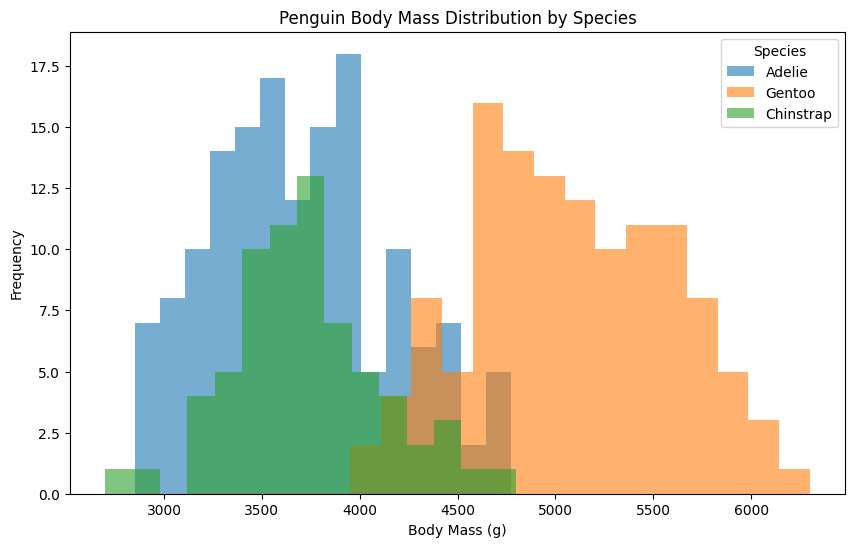

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset directly from the URL
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
pp_df = pd.read_csv(url)

# Drop rows with missing body mass values to clean the data for plotting
pp_df = pp_df.dropna(subset=['body_mass_g'])

# Plotting the histogram of body masses grouped by species
plt.figure(figsize=(10, 6))

# Group the data by species and plot each group separately
for species in pp_df['species'].unique():
    species_data = pp_df[pp_df['species'] == species]
    plt.hist(species_data['body_mass_g'], bins=15, alpha=0.6, label=species)

# Adding title, labels, and legend
plt.title('Penguin Body Mass Distribution by Species')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.legend(title="Species")
plt.show()


### Challenge Problem

Write a function ```interleaveArrays``` that takes as arguments two numpy arrays A and B and return a new numpy array with the rows of A and B interleaved, starting with A. If you run out of rows from one matrix or the other complete the array with the remaining rows of the longer array.

If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2

Example:

```
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)
```
returns
```
array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]])
```

In [17]:
import numpy as np

def interleaveArrays(A, B):
    # Check if A and B have the same number of columns
    if A.shape[1] != B.shape[1]:
        print('Error: Shapes of arrays are not compatible.')
        return -1

    # Check if A and B have the same data type
    if A.dtype != B.dtype:
        print('Error: Types of arrays are not compatible.')
        return -2

    # Determine the number of rows for each array
    rows_A, rows_B = A.shape[0], B.shape[0]
    max_rows = max(rows_A, rows_B)
    
    # Create an empty list to store interleaved rows
    interleaved_rows = []

    # Interleave rows
    for i in range(max_rows):
        if i < rows_A:
            interleaved_rows.append(A[i])
        if i < rows_B:
            interleaved_rows.append(B[i])

    # Convert the list of interleaved rows back to a numpy array
    return np.array(interleaved_rows)

# Example test case
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

# Testing the function
result = interleaveArrays(G, H)
print(result)


[[   1    2    3]
 [  10   20   30]
 [   4    5    6]
 [ 100  200  300]
 [1000 2000 3000]]
